Nama: Kiran Cakra Prahazart Nuryama<br>
Kampus: Universitas Padjadjaran<br>
Jurusan: Manajemen Produksi Media

## **Tugas**

Lakukan Klasifikasi Customer Churn dengan Decision Tree:
1. buat model dan gambar pohonnya
2. Cari feature apa yang paling penting di kasus tersebut.
3. Hitung akurasinya, bandingkan dengan hasil di KNN, mana kah model yang lebih baik untuk kasus Customer churn?

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# load dataset
db = pd.read_csv('http://buku.dioskurn.com/buku1/ch9/churnprediction_ch9.csv', index_col=['customer_id'])
db

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1


In [ ]:
# Pada product, nilai atribut Kartu A didefinisikan sebagai 0, Kartu B didefinisikan sebagai 1, dan Kartu C didefinisikan sebagai 2
db['product'] = db['product'].map({'Kartu A': 0,'Kartu B': 1, 'Kartu C':2})
db['product'].value_counts()
db

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,0,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,0,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,0,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,0,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,1,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
a310627191bdbded3905ac73e77fe319,1,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
b6f11059e5c1df69b8c16d5c39af23dc,1,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1


In [ ]:
db.columns

Index(['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure',
       'churn'],
      dtype='object')

In [ ]:
#split dataset in features and target variable

x = db.iloc[:, :13] # Features
y = db.iloc[:, 13] # Target variable

In [ ]:
print(x, y)

                                  product  reload_1  reload_2    video  \
customer_id                                                              
285fae8412c4720a0c79d95f98434422        0  27734.30  24381.32  22000.0   
f45bce87ca6bf100f222fcc0db06b624        0  26433.00  26515.50      0.0   
09b54557b1e2a10d998e3473a9ccd2a0        0  93212.17  67101.83      0.0   
11f252f48be36f93dd429f2ec86cb2f5        0    183.33   1087.17      0.0   
a8df29ae9195eea348d2f74c967b978d        0  95296.67  76246.50      0.0   
...                                   ...       ...       ...      ...   
9e8b318d96caa9c0c4a50e8e59f5026c        1   1634.33  12085.33      0.0   
a310627191bdbded3905ac73e77fe319        1  30000.33  45170.67      0.0   
b6f11059e5c1df69b8c16d5c39af23dc        1   3333.33  13338.67      0.0   
88709f1defd232243f729912be696f87        1  25000.00  33333.33      0.0   
2c5bc32bc9a9c393d393bfc11c409b0d        2      0.00  11084.00      0.0   

                                    m

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9335


In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Customer_Churn.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

Feature: product Score:  0.01970825074731036 %
Feature: reload_1 Score:  0.03456276334929661 %
Feature: reload_2 Score:  0.3510879426426742 %
Feature: video Score:  0.008520096731888565 %
Feature: music Score:  0.007558959602148868 %
Feature: games Score:  0.03146896236244449 %
Feature: chat_1 Score:  0.01746601705931793 %
Feature: chat_2 Score:  0.006759821798312027 %
Feature: socmed_1 Score:  0.004519776496796876 %
Feature: socmed_2 Score:  0.006212470663875335 %
Feature: internet Score:  0.04913317912702488 %
Feature: days_active Score:  0.22826981103318206 %
Feature: tenure Score:  0.23473194838572783 %


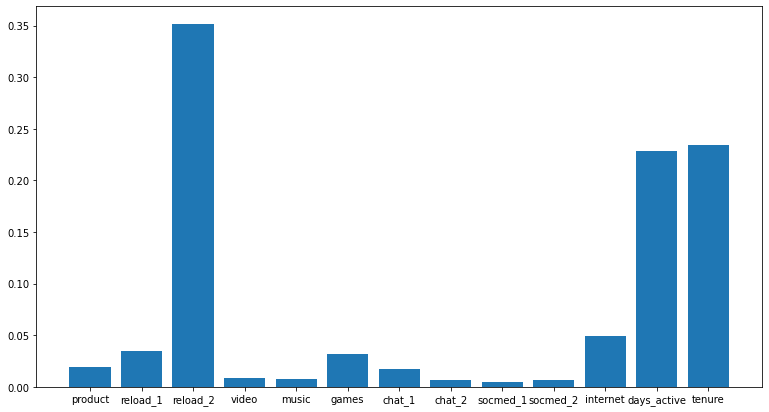

In [ ]:
import matplotlib.pyplot as plt

importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature:', feature_cols[i],'Score: ', v, '%')
# plot feature importance
plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], importance)
plt.show()

## **Kesimpulan**

Feature apa yang paling penting di kasus tersebut adalah reload_2


Sedangkan pada perhitungan akurasi antar 2 model yaitu, 
1.   K-NN: 0.9265 with k= 4 <br>

2.   Decision Tree: 0.9335 <br><br>

Dengan hasil tersebut, maka dataset Customer Churn mendapatkan hasil akurasi 
terbaik dengan menggunakan Decision Tree dibandungan dengan K-NN, namun perbandingan antara keduanya tidak terlalu signifikan.<br><br>
